<a href="https://colab.research.google.com/github/misbahsy/APMonitor-do/blob/master/ModelFormulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Formulation Strategies

<p class='vspace'>One of the most important factors in efficient and reliable solution of dynamic systems is the model formulation. Changes in model formulation are not intended to change the equations, only to put them into a form that allows solvers to more easily find an accurate solution. In each section below are some of the key strategies related to model creation and formulation. The discussion begins with a basic introduction to the APMonitor Modeling Language.
</p>
<p class='vspace'>Models consist of sections including constants, parameters, variables, intermediates, equations, objects, and connections. All expressions used in the equations section must be created in one of the prior sections. The initialization of individual parameters or variables is sequential in the order that they are listed in the model file. Equations, however, can be listed in any order because equations are solved simultaneously.
</p>
<div class='vspace'></div><ul><li><strong>Constants</strong> are values that never change. Integer values may be defined to give sizes to arrays (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Constants' rel='nofollow'>additional details on constants</a>).
</li><li><strong>Parameters</strong> are values that are nominally fixed at initial values but can be changed with input data, by the user, or can become calculated by the optimizer to minimize an objective function if they are indicated as decision variables (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Parameters' rel='nofollow'>additional details on parameters</a>).
</li><li><strong>Variables</strong> are always calculated values as determined by the set of equations. Some variables are either measured and/or controlled to a desired target value (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Variables' rel='nofollow'>additional details on variables</a>).
</li><li><strong>Intermediates</strong> are explicit equations where the variable is set equal to an expression that may include constants, parameters, variables, or other intermediate values that are defined previously. Intermediates are not implicit equations but are explicitly calculated with each model function evaluation (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Intermediates' rel='nofollow'>additional details on intermediates</a>).
</li><li><strong>Equations</strong> are either equality constraints as <em>f(dx/dt,x,p)=0</em>, inequality constraints as <em>g(dx/dt,x,p)&gt;0</em>, or expression of the objective with statements that begin with keywords <em>maximize</em> or <em>minimize</em> (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Equations' rel='nofollow'>additional details on equations</a>).
</li><li><strong>Objects</strong> are object-oriented extensions of APMonitor that are stand-alone models that are instantiated from parent objects. The children objects may include parameters, variables, equations, and objective terms (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Objects' rel='nofollow'>additional details on objects</a>).
</li><li><strong>Connections</strong> are equality constraints that relate object variables to model parameter or variables from other models (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/Connections' rel='nofollow'>additional details on connections</a>).
</li></ul><p class='vspace'>There is an additional optional designation of parameters as either fixed values (<em>FVs</em>) or manipulated variables (<em>MVs</em>). Variables can be optionally designated as state variables (SVs) or controlled variables (<em>CVs</em>). The terminology of <em>FV, MV, SV,</em> and <em>CV</em> is from the process systems engineering community. In this community the <em>MVs</em> are designated as the inputs that are potentially changed by the controller and <em>CVs</em> are model outputs that are driven to target conditions. The terms <em>FVs</em> refer to either measured or unmeasured disturbances to the system and <em>SVs</em> are simply designated for viewing purposes as variables of importance. These parameter and variable classifications are specified in MATLAB or Python scripts (See <a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/INFO' rel='nofollow'>additional details on FV, MV, SV, and CV classification</a>).
</p>
<p class='vspace'>Collections of constants, parameters, variables, intermediates, equations, objects, and connections constitute a model. The model file is created and stored in a text file with extension <em>apm</em>. Several text editors are available that support syntax highlighting such as Notepad++ and gEdit (<a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/SyntaxHighlighting' rel='nofollow'>see installation instructions</a>). Below is an example model that demonstrates the use of many of these sections to create a 5th order differential equation model.
</p>
<div class='vspace'></div><pre> ! input  (1) = u
 ! states (5) = x[1] to x[5]
 ! output (1) = y
 Constants
   n = 5
   K = 4
 Parameters
   u = 3, &gt;=0, &lt;=10
 Variables
   x[1:n] = u, &gt;=0
 Intermediates
   y = x[n]
 Equations
   $x[1]   + x[1]   = K * u
   $x[2:n] + x[2:n] = x[1:n-1]
   minimize (y-5)^2
</pre><p class='vspace'>In the above model comments are designated with <em>!, %,</em> or <em>#</em>. Another symbol is the dollar sign <em>$</em> that indicates a differential variable or <em>dx<sub>i</sub>/dt</em>. The definition of <em>x[1:5]</em> in the variables section creates 5 separate variables or <em>x[1], x[2], x[3], x[4],</em> and <em>x[5]</em>. Each variable is initialized with a lower bound of <em>0</em> and an initial condition of <em>u=3</em>. The variable <em>y</em> is defined in the intermediates section. This variable is a copy of x[5] and is used in the objective function as an output with a desired target value of <em>5</em>. The quantity <em>x[n]</em> could also be used in the objective function instead with the same result. However, there are no degrees of freedom for this problem so the objective function has no effect on the solution.
</p>

##Time Discretization

<p>There is an inherent trade-off between accuracy and computational speed for numerical solution. Additional time discretization points generally improve the accuracy of a solution but also create additional computational burden. Fewer discretization points are needed when the dynamics are slow or the system is near a steady state solution. As a compromise finer discretization points are often used in regions of fast dynamics and more coarse discretization is used in regions of slow dynamics. Often the fast dynamics are present after a step change in an input or near the beginning of a horizon. Fast dynamics naturally decay as the system exceeds two dominant time constants after a change. The dominant time constant is generally dictated by the slowest process in the system to reach steady state. A dominant time constant is often empirically obtained by introducing a step input and simulating the system until it reaches steady state. The dominant time constant is approximately the amount of time necessary to reach (1-e<sup>-1</sup>) or 63% of the total response change from initial value to steady state.
</p>
<p class='vspace'>There are also cases where dynamic data has been collected from a prior event. In these cases the model predictions are desired for comparison with the dynamic data. To compare model and data at each time point, the simulation step size of the simulation is adjusted to match the data frequency. These replay simulations can take excessive computational effort when large amounts of data are available. For these cases of dynamic data reconciliation, downsampling or less frequent time steps of the data may be used by collecting moving averages, infrequent points, or 
simply predicting at less frequent intervals than the data set.
</p>
##Slack Variables
<p><a class='urllink' href='https://apmonitor.com/wiki/index.php/Main/SlackVariables' rel='nofollow'>Slack variables</a> are defined to transform an inequality expression into an equality expression with an added slack variable. The general expression for inequality constraints in the DAE expression is <em>g(dx/dt,x,p)&gt;0</em>. An equivalent mathematical expression of the general inequality is <em>g(dx/dt,x,p)=s</em> and <em>s&gt;0</em>. This form is desirable with solvers such as interior point methods where the initial guess must satisfy all inequality constraints or be on the inside of the feasible region. In the slack variable form, an initial guess value greater than zero for the new slack variable <em>s</em> satisfies this requirement. The APMonitor Modeling Language automatically transforms all inequality constraints into equivalent equality constraints with added slack variables.
</p>
<div class='vspace'></div><ul><li><a class='urllink' href='https://apmonitor.com/online/view_pass.php?f=slack.apm' rel='nofollow'>Click to Solve a Slack Variable Optimization Problem</a>


In [2]:
#@title
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/jh6BK0BqqIs?rel=0" frameborder="0" allowfullscreen></iframe>

##Conditional Statements
<p>Certain functions such as <em>abs</em>, <em>if..then</em>, <em>min</em>, <em>max</em>, <em>signum</em>, and discontinuous functions can be included in models but need to be posed in a way to allow efficient solution by solvers that perform better with continuous first and second derivatives. There are alternative methods to reformulate the problems. Two popular approaches are as <a class='urllink' href='https://apmonitor.com/wiki/index.php/Apps/MpecExamples' rel='nofollow'>MPECs</a> (Mathematical Programs with Equilibrium Constraints) or with <a class='urllink' href='https://apmonitor.com/me575/index.php/Main/LogicalConditions' rel='nofollow'>binary variables</a> that switch on or off certain elements of the equations.
</p>
<div class='vspace'></div><h4>Model Complexity</h4>
<p>Model complexity can range from detailed finite element analysis to simple reduced order models. An important aspect of modeling is the overall goal of capturing the input to output relationships for a particular target application. In the case of real-time embedded systems, the complexity of the model may need to be limited to meet simulation or optimization speed requirements. Other times there is no computational time target for a solution and more sophisticated models can be solved. In each case, the correct level of sophistication should be carefully considered. One strategy for finding the appropriate level of complexity is to start with simple models and add complexity only as needed.
</p>

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ELEUFKzwUj0" frameborder="0" allowfullscreen></iframe>

##Exercise
<p><strong>Objective:</strong> Formulate a dynamic model with model quantities such as constants, parameters, and variables and model expressions such as intermediates and equations. Use time-varying inputs, initial conditions, and mass balance equations to specify the problem inputs and dynamics. Create a MATLAB or Python script to simulate and display the results. <em>Estimated Time: 2 hours</em>
</p>
<p class='vspace'>In Utah, water flows into the (1) <a class='urllink' href='https://en.wikipedia.org/wiki/Jordanelle_Reservoir' rel='nofollow'>Jordanelle reservoir</a>, to the (2) <a class='urllink' href='https://en.wikipedia.org/wiki/Deer_Creek_Dam_and_Reservoir' rel='nofollow'>Deer Creek reservoir</a>, to (3) <a class='urllink' href='https://en.wikipedia.org/wiki/Utah_Lake' rel='nofollow'>Utah Lake</a>, and finally to the (4) <a class='urllink' href='https://en.wikipedia.org/wiki/Great_Salt_Lake' rel='nofollow'>Great Salt Lake</a>.
</p>
<div class='vspace'></div>
<table border='0' width='100%' ><tr><td width='20%'  valign='top'>
<div><img src='http://apmonitor.com/do/uploads/Main/utah_reservoir_graphic.png' alt='' title='' /></div>
</td><td width='80%'  valign='top'>
<div><img src='http://apmonitor.com/do/uploads/Main/utah_reservoirs.png' alt='' title='' /></div>
</td></tr></table>
<p class='vspace'>Suppose that there is a spillway from each upstream body of water to the lower body of water with a flow that is proportional to the square root of the reservoir height. There is no outflow from the Great Salt Lake except due to evaporation. Develop a simplified dynamic model of the height change in each reservoir from water mass balances. Below are constants such as area (km<sup>2</sup>) and usage requirements (km<sup>3</sup>/yr), inlet and outlet flow correlations (km<sup>3</sup>/yr), evaporation correlations, and initial conditions for the volumes (km<sup>3</sup>).
</p>
<div class='vspace'></div><pre> Outflow River Rates (km<sup>3</sup>/yr) with height in meters
 V<sub>flow_out1</sub> = 0.030 sqrt(h<sub>1</sub>) 
 V<sub>flow_out2</sub> = 0.015 sqrt(h<sub>2</sub>) 
 V<sub>flow_out3</sub> = 0.060 sqrt(h<sub>3</sub>)
 V<sub>flow_out4</sub> = 0

 Evaporation Rates (km<sup>3</sup>/yr)
 V<sub>evap</sub> = 0.5e-5 * Area, for salt water (Great Salt Lake)
 V<sub>evap</sub> = 1e-5 * Area, for fresh water (all others)

 Inflow Rates (km<sup>3</sup>/yr)
 V<sub>flow_in1</sub> = 0.13 (June-Feb), 0.21 (Mar-May)
 V<sub>flow_in2</sub> = V<sub>flow_out1</sub>
 V<sub>flow_in3</sub> = V<sub>flow_out2</sub>
 V<sub>flow_in4</sub> = V<sub>flow_out3</sub>

 Usage Requirements (km<sup>3</sup>/yr)
 V<sub>use1</sub> = 0.03
 V<sub>use2</sub> = 0.05
 V<sub>use3</sub> = 0.02
 V<sub>use4</sub> = 0.00

 Area of Reservoir / Lake (km<sup>2</sup>)
 A<sub>1</sub> = 13.4
 A<sub>2</sub> = 12.0
 A<sub>3</sub> = 384.5
 A<sub>4</sub> = 4400

 Initial Volume of Reservoir / Lake (km<sup>3</sup>)
 V<sub>1</sub> = 0.26
 V<sub>2</sub> = 0.18
 V<sub>3</sub> = 0.68
 V<sub>4</sub> = 22.0
</pre><p class='vspace'>Simulate the height of the reservoirs (in meters) over the course of a year, starting in January, with higher inlet flowrates in the spring due to melting snow. Use a <a class='urllink' href='https://youtu.be/6Cc693cmqCc' rel='nofollow'>mass balance</a> to describe the change in volume and height of each body of water. This is a simple simulation model that assumes no active control. In actual practice, water outlet flows are actively managed to maintain reservoir levels for recreation, provide sufficient river flow rates, limit river flow rates to avoid flooding, and serve agricultural and community needs. Utah Lake and the Great Salt Lake also have additional inlet sources such as the Payson River (Utah Lake) and the Weber River and Bear River (Great Salt Lake) that are not considered in this simulation.
</p>

##Solutions
<div><img src='http://apmonitor.com/do/uploads/Main/download.png' alt='' title='' /> <a class='urllink' href='http://apmonitor.com/do/uploads/Main/simulate_reservoirs.zip' rel='nofollow'>Reservoir Simulation in MATLAB and Python</a></div>

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/ZzYURrtD4YI?rel=0" frameborder="0" allowfullscreen></iframe>
<div class='vspace'></div><hr />
<div class='vspace'></div>
<iframe width="560" height="315" src="https://www.youtube.com/embed/BHxNe86_TXc" frameborder="0" gesture="media" allow="encrypted-media" allowfullscreen></iframe>

apm 35.203.137.177_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.8.7
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            4
   Variables    :           21
   Intermediates:            7
   Connections  :            0
   Equations    :           19
   Residuals    :           12
 
 Number of state variables:            192
 Number of total equations: -          192
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains 

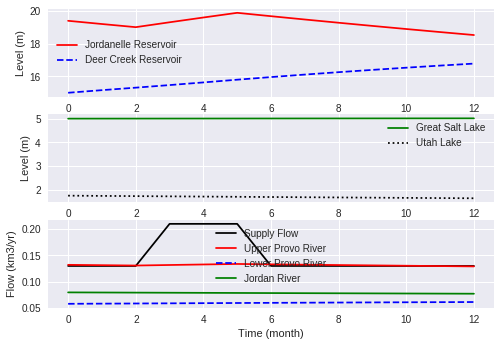

In [0]:
#@markdown Solution using Gekko

from __future__ import division
from gekko import GEKKO
import numpy as np

#Initial conditions
c = np.array([0.03,0.015,0.06,0])
areas = np.array([13.4, 12, 384.5, 4400])
V0 = np.array([0.26, 0.18, 0.68, 22])
h0 = 1000 * V0 / areas
Vout0 = c * np.sqrt(h0)
vin = [0.13,0.13,0.13,0.21,0.21,0.21,0.13,\
       0.13,0.13,0.13,0.13,0.13,0.13]
Vin = [0,0,0,0]

#Initialize model
m = GEKKO()

#time array 
m.time = np.linspace(0,1,13)
#define constants
c = m.Array(m.Const,4,value=0)
c[0].value = 0.03
c[1].value = c[0] / 2
c[2].value = c[0] * 2
c[3].value = 0
Vuse = [0.03,0.05,0.02,0.00]

#Parameters
evap_c = m.Array(m.Param,4,value=1e-5)
evap_c[-1].value = 0.5e-5

A = [m.Param(value=i) for i in areas]

Vin[0] = m.Param(value=vin)

#Variables
V = [m.Var(value=i) for i in V0]
h = [m.Var(value=i) for i in h0]
Vout = [m.Var(value=i) for i in Vout0]

#Intermediates
Vin[1:4] = [m.Intermediate(Vout[i]) for i in range(3)]
Vevap = [m.Intermediate(evap_c[i] * A[i]) for i in range(4)]

#Equations
m.Equations([V[i].dt() == \
             Vin[i] - Vout[i] - Vevap[i] - Vuse[i] \
             for i in range(4)])
m.Equations([1000*V[i] == h[i]*A[i] for i in range(4)])
m.Equations([Vout[i]**2 == c[i]**2 * h[i] for i in range(4)])


#Set to simulation mode
m.options.imode = 4

#Solve
m.solve()

#%% Plot results
time = [x * 12 for x in m.time] 

# plot results
import matplotlib.pyplot as plt
plt.figure(1)

plt.subplot(311)
plt.plot(time,h[0].value,'r-')
plt.plot(time,h[1].value,'b--')
plt.ylabel('Level (m)')
plt.legend(['Jordanelle Reservoir','Deer Creek Reservoir'])

plt.subplot(312)
plt.plot(time,h[3].value,'g-')
plt.plot(time,h[2].value,'k:')
plt.ylabel('Level (m)')
plt.legend(['Great Salt Lake','Utah Lake'])

plt.subplot(313)
plt.plot(time,Vin[0].value,'k-')
plt.plot(time,Vout[0].value,'r-')
plt.plot(time,Vout[1].value,'b--')
plt.plot(time,Vout[2].value,'g-')
plt.xlabel('Time (month)')
plt.ylabel('Flow (km3/yr)')
plt.legend(['Supply Flow','Upper Provo River', \
            'Lower Provo River','Jordan River'])
plt.show()
